In [7]:
import os
import textract
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
resume_path = '/Users/Ketki/Documents/MS Theses/Reference Papers and Data/Selected/'
reference = '/Users/Ketki/Documents/MS Theses/Candidate list.xlsx'

In [3]:
def preprocessText(text, textEncoding = 'windows-1252'):
    text = re.sub(r'[^\x20-\x7e]',r' ', text.decode(encoding = textEncoding))
    return text

In [4]:
def getResumeReference(referencePath):
    refDataFrame = pd.read_excel(reference)
    return refDataFrame

In [5]:
def getResumeDataFrame(resumePath):
    resume_list = []
    r_file_list = []
    
    for file in os.listdir(resume_path):
        if file == '.DS_Store':
            continue
            
        filename = resume_path + file
        #print(filename)
        r_file_list.append(file)
        
        try:
            text = textract.process(filename)
            text = preprocessText(text, 'utf-8')
            resume_list.append(text)
        except Exception as se:
            print('{} -> {}'.format(file, se))
            
    resumeDataFrame = pd.DataFrame(list(zip(r_file_list,resume_list)), \
                             columns = ['res_name','res_contents'])
    refDataFrame = getResumeReference(reference)
    
    resumeDataFrame = resumeDataFrame.join(refDataFrame.set_index('res_name'),\
                                           on = 'res_name')
#    print(resumeDataFrame)
    return resumeDataFrame

In [15]:
def getFeaturesCount(resumeDataFrame):
#    malayDataFrame = resumeDataFrame.loc[lambda resumeDataFrame: resumeDataFrame['nationality'] == 'Malaysia']
#    indiaDataFrame = resumeDataFrame.loc[lambda resumeDataFrame: resumeDataFrame['nationality'] == 'India']
    chinaDataFrame = resumeDataFrame.loc[lambda resumeDataFrame: resumeDataFrame['nationality'] == 'China']
    
    vec = TfidfVectorizer(stop_words = 'english', lowercase = True)
#    X = vec.fit_transform(malayDataFrame['res_contents'])
#    X = vec.fit_transform(indiaDataFrame['res_contents'])
    X = vec.fit_transform(chinaDataFrame['res_contents'])

    X = normalize(X)
    feature = vec.get_feature_names()
#    print(feature)
    featureCount = pd.DataFrame(X.toarray(), columns = feature)
#    print(featureCount)
    totalCount = featureCount.select_dtypes(pd.np.number).sum()
#    print(totalCount)
#    totalCount.to_excel('Malaysia_top_words.xlsx')
#    totalCount.to_excel('India_top_words.xlsx')
#    totalCount.to_excel('China_top_words.xlsx')
    wordFreq = totalCount.to_dict()
#    print(wordFreq)
    return wordFreq

In [14]:
def getWordCloud(wordFreq):
# generate tag cloud from frequencies i.e. word counts from the CountVectorizer function    
    wc = WordCloud(background_color = 'white',width = 1024,height = 720).generate_from_frequencies(wordFreq)
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
#    wc.to_file('/Users/Ketki/Documents/MS Theses/Reference Papers and Data/Fig/Malaysia_top_words.png')
#    wc.to_file('/Users/Ketki/Documents/MS Theses/Reference Papers and Data/Fig/India_top_words.png')
    wc.to_file('/Users/Ketki/Documents/MS Theses/Reference Papers and Data/Fig/China_top_words.png')

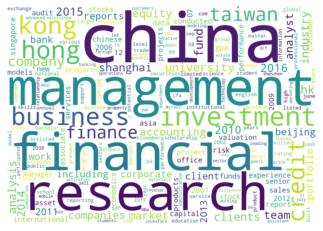

In [16]:
if __name__ == '__main__':
    
    resumeDataFrame = getResumeDataFrame(resume_path)
    wordFreq = getFeaturesCount(resumeDataFrame)
    getWordCloud(wordFreq)